In [1]:
%pip install networkx[default]

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [19]:
N=[[-7, 6],
[-2, -9],
[2, 13],
[7, -6],
[6.846075241173382, -0.7061717170771983],
 [-5.883076343963735, 6.276749557836347],
]

N=[[6.846075241173382, -0.7061717170771983],
 [-5.883076343963735, 6.276749557836347],
 [-6.10955557850388, 5.107993849741389],
 [8.104350235417453, -0.3171652778124078],

]
k=2
n=len(N)

Total number of nodes:  8
Total number of edges:  14
List of all nodes:  ['s', 't', 1, 2, 3, 4, 'k1', 'k2']
List of all edges:  [('s', 'k1', {'weight': 0, 'capacity': 4}), ('s', 'k2', {'weight': 0, 'capacity': 4}), (1, 't', {'weight': 0, 'capacity': 1}), (2, 't', {'weight': 0, 'capacity': 1}), (3, 't', {'weight': 0, 'capacity': 1}), (4, 't', {'weight': 0, 'capacity': 1}), ('k1', 1, {'weight': 0.0, 'capacity': 1}), ('k1', 2, {'weight': 14.518694487075585, 'capacity': 1}), ('k1', 3, {'weight': 14.200453907328109, 'capacity': 1}), ('k1', 4, {'weight': 1.3170352960074336, 'capacity': 1}), ('k2', 1, {'weight': 14.518694487075585, 'capacity': 1}), ('k2', 2, {'weight': 0.0, 'capacity': 1}), ('k2', 3, {'weight': 1.1904968495894628, 'capacity': 1}), ('k2', 4, {'weight': 15.463758119337228, 'capacity': 1})]
Degree for all nodes:  {'s': 2, 't': 4, 1: 3, 2: 3, 3: 3, 4: 3, 'k1': 5, 'k2': 5}
2.5075321455968966
{'s': {'k1': 2, 'k2': 2}, 't': {}, 1: {'t': 1}, 2: {'t': 1}, 3: {'t': 1}, 4: {'t': 1}, 'k1

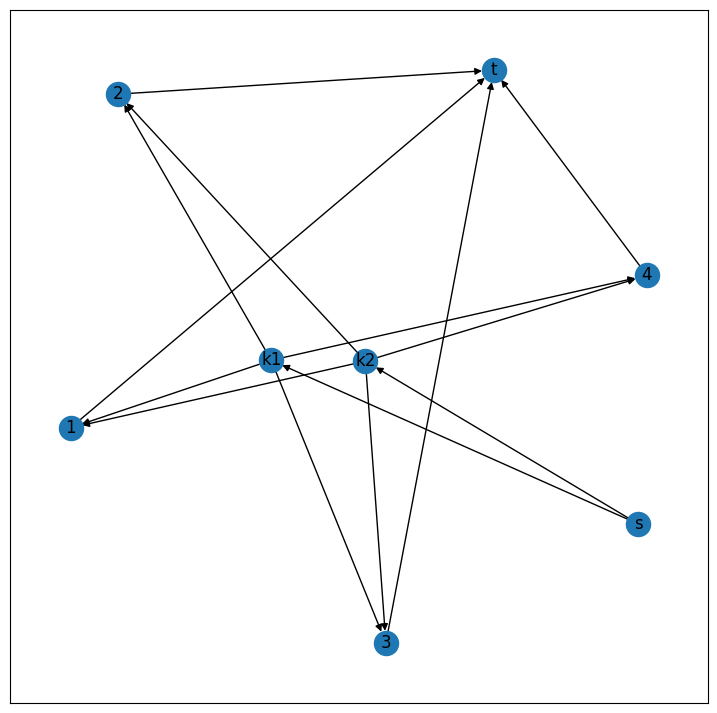

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import math


def show_graph():
    nx.draw_networkx(G, pos = pos, arrows = True,
    node_shape = "s", node_color = "white")
    plt.title("MCF network")
    plt.show()


def cost(a,b):
    return math.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2)


G=nx.DiGraph()
G.add_node("s", demand=-1*n)
G.add_node("t", demand=n)

G.add_nodes_from(range(1,n+1))

G.add_nodes_from(['k'+str(i) for i in range(1,k+1)])

for i in range(1,k+1):
    G.add_edge("s",'k'+str(i),weight = 0 ,capacity=n)

for i in range(1,k+1):
    for j in range(1,n+1):
            G.add_edge('k'+str(i),j,weight = cost(N[i-1],N[j-1]) ,capacity=1)
        
for j in range(1,n+1):
    G.add_edge(j,"t" ,weight = 0 ,capacity=1)

#nodes=['s','t']+[i for i in range(1,n+1)]+['k'+ str(i) for i in range(1,k+1)]

plt.figure(figsize =(9, 9))
nx.draw_networkx(G)

print("Total number of nodes: ", int(G.number_of_nodes()))
print("Total number of edges: ", int(G.number_of_edges()))
print("List of all nodes: ", list(G.nodes()))
print("List of all edges: ", list(G.edges(data = True)))
print("Degree for all nodes: ", dict(G.degree()))

flowDict = nx.min_cost_flow(G)
flowCost,flowDict=nx.capacity_scaling(G)
print(flowCost)
print(flowDict)

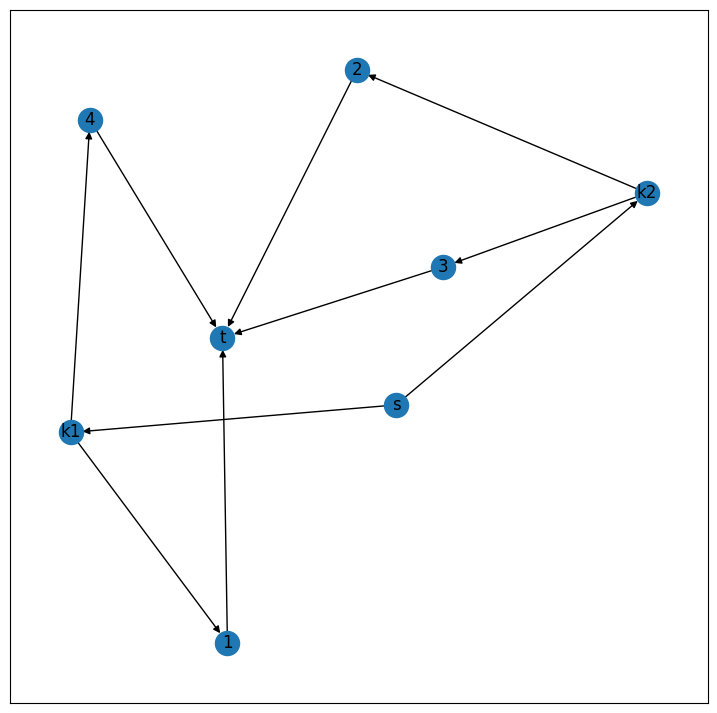

In [38]:
#final solution
S = nx.DiGraph()

for f in flowDict.keys():
    for to in flowDict[f].keys():
        if flowDict[f][to]!=0:
            S.add_nodes_from([f,to])
            S.add_edge(f,to)
plt.figure(figsize =(9, 9))
nx.draw_networkx(S)

In [62]:
import random
import copy

def drawAndGiveInfo(G):
    plt.figure(figsize =(9, 9))
    nx.draw_networkx(G)

    print("Total number of nodes: ", int(G.number_of_nodes()))
    print("Total number of edges: ", int(G.number_of_edges()))
    print("List of all nodes: ", list(G.nodes()))
    print("List of all edges: ", list(G.edges(data = True)))
    print("Degree for all nodes: ", dict(G.degree()))

n=6
N=[[-7, 6],
[-2, -9],
[2, 13],
[7, -6],
[6.846075241173382, -0.7061717170771983],
 [-5.883076343963735, 6.276749557836347],
]
def phase2(N,k):
    G=nx.DiGraph()
    G.add_node("s", demand=-1*n)
    G.add_node("t", demand=n)

    G.add_nodes_from(range(1,n+1))

    G.add_nodes_from(['k'+str(i) for i in range(1,k+1)])

    for i in range(1,k+1):
        G.add_edge("s",'k'+str(i),weight = 0 ,capacity=n)

    for i in range(1,k+1):
        for j in range(1,n+1):
            G.add_edge('k'+str(i),j,weight = cost(N[i-1],N[j-1]) ,capacity=1)
            
    for j in range(1,n+1):
        G.add_edge(j,"t" ,weight = 0 ,capacity=1)

    flowCost,flowDict=nx.capacity_scaling(G)
    return flowCost

def newN(NN,k):
    nodes= copy.copy(NN)
    selectedNodes=set()
    while(len(selectedNodes)<k):
        selectedNodes.add(random.randint(0,n-1))
    newNodes=[]
    temp=[]
    for i in range(n):
        if i not in selectedNodes:
            newNodes.append(nodes[i])

        else:
            temp.append(nodes[i])


    return temp+newNodes


#    phase2(nodes,k)

flowCostsForAllClusters=[0 for i in range(n)]
minFlowCosts=set()
for i in range(10):
    for k in range(2,n+1):
        flowCostsForAllClusters[k-2] = phase2(newN(N,k),k)
    minFlowCosts.add( flowCostsForAllClusters.index(min(flowCostsForAllClusters)))
print(flowCostsForAllClusters)
print(minFlowCosts)

[58.4378162363866, 20.998274926753876, 6.44676484190011, 5.296065588760511, 0.0, 0]
{4}


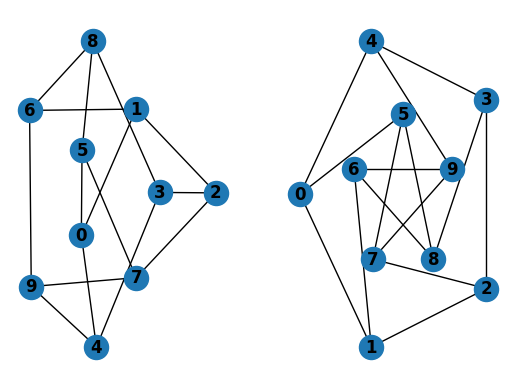

In [4]:
import matplotlib.pyplot as plt
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
#G = nx.petersen_graph()
G = nx.DiGraph()
k=2
n=6
e=[]
for a in range(n):
    for b in range(n):
        e.append((a,b))
print(e)
G.add_node(range(0,n))
G.add_edges_from(e)


G = nx.DiGraph()
nodes = np.arange(0, 8).tolist()
G.add_nodes_from(nodes)
G.add_edges_from([(0,1), (0,2),
 (1,3), (1, 4),
 (2, 5), (2, 6), (2,7)])
pos = {0:(10, 10),
 1:(7.5, 7.5), 2:(12.5, 7.5),
 3:(6, 6), 4:(9, 6),
 5:(11, 6), 6:(14, 6), 7:(17, 6)}
'''labels = {0:"CEO",
 1:"Team A Lead", 2: "Team B Lead",
 3:"Staff A", 4: "Staff B",
 5:"Staff C", 6: "Staff D", 7: "Staff E"}'''
nx.draw_networkx(G, pos = pos, arrows = True,
 node_shape = "s", node_color = "white")
plt.title("Organogram of a company.")

plt.show()

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5)]


NameError: name 'np' is not defined